<a href="https://colab.research.google.com/github/SenolIsci/finance_portfolio_optimization_deep_learning_transformers/blob/main/SP500_Portfolio_Optimization_DEEP_LEARNING_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!ls

Mounted at /content/gdrive
'BIST Portfolio Optimization'
 black_litterman.ipynb
 blackwell_littermann_lab_23.ipynb
 data
 databist
 databistall_stocks_5yr.csv
 data_plain
'Hidden Markov Model.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 model_checkpoint.h5
'PCA.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Portfolio Optimization.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Q-Learning Trader.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Regression-Based Strategy 0-1.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 sp500_close.csv
'SP500 Portfolio Optimization'
'SP500 Portfolio Optimization DEEP LEARNONG MODELS'
 sp500sub.csv
'Trend-Following Revisited.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
'Trend Following Strategy SMA.ipynb adlı not defterinin kopyası adlı dosyanın kopyası'
 ts_stck_prt1
 ts_stck_prt10
 ts_stck_prt11
 ts_stck_prt12
 ts_stck_prt2
 ts_stck_prt3
 ts_stck_prt4
 ts_stck_prt5
 ts_stck_prt6
 ts_stck_

data source

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=INTC&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TSLA&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=LON.IAG&outputsize=full&apikey=S7ZA74J04RY49JPY&datatype=csv



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [ ]:
os.listdir('./data')


['daily_adjusted_TSLA.csv',
 'daily_adjusted_INTC.csv',
 'daily_adjusted_AMD.csv',
 'daily_adjusted_AAPL.csv',
 'daily_adjusted_MSFT.csv',
 'daily_adjusted_GOOG.csv',
 'daily_adjusted_FB.csv',
 'daily_adjusted_IBM.csv',
 'airline_passengers.csv',
 'daily_adjusted_SPY500.csv',
 'daily_adjusted_BNTX.csv',
 'daily_adjusted_NIO.csv',
 'daily_adjusted_SRNE.csv',
 'daily_adjusted_CVAC.csv',
 'daily_adjusted_MRNA.csv',
 'daily_adjusted_IQQH.csv',
 'sp500_close.csv',
 'all_stocks_5yr.csv']

In [ ]:
sym_list=[i.split('_')[2].split('.')[0] for i in os.listdir('./data') if i.split('_')[0]=='daily']
sym_list

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
df_all=pd.DataFrame({})
for i in os.listdir('./data'):
  if i.split('_')[0]=='daily':
    sym=i.split('_')[2].split('.')[0]   
    df=pd.read_csv(''.join(["./data/", str(i)]),names=["timestamp",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"],header=0, thousands=',')
    df.columns=["date",	"open",	"high",	"low",	"close",	"adjusted_close",	"volume",	"dividend_amount",	"split_coefficient"]
    df['Name']=sym
    df=df.iloc[::-1].reset_index(drop=True)


    df_all=pd.concat([df_all,df],axis=0)
df_all['date']=df_all['date'].apply(pd.to_datetime)
df_all=df_all.set_index('date',drop=True)
df_all.to_csv('./data/'+'all_stocks_5yr.csv',index=True)
df_all.columns

Index(['open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'dividend_amount', 'split_coefficient', 'Name'],
      dtype='object')

In [ ]:
selected_column=['adjusted_close']

In [ ]:

df_all

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [ ]:
symbols = df_all['Name'].unique().tolist()
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
df=df_all
df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,Name
date,,,,,,,,,
2010-06-29,19.000,25.0000,17.540,23.890,4.778,18766300,0.0,1.0,TSLA
2010-06-30,25.790,30.4192,23.300,23.830,4.766,17187100,0.0,1.0,TSLA
2010-07-01,25.000,25.9200,20.270,21.960,4.392,8218800,0.0,1.0,TSLA
2010-07-02,23.000,23.1000,18.710,19.200,3.840,5139800,0.0,1.0,TSLA
2010-07-06,20.000,20.0000,15.830,16.110,3.222,6866900,0.0,1.0,TSLA
...,...,...,...,...,...,...,...,...,...
2020-12-04,10.900,10.9280,10.780,10.892,10.892,0,0.0,0.0,IQQH
2020-12-07,10.968,11.0280,10.894,10.950,10.950,0,0.0,0.0,IQQH
2020-12-08,11.010,11.1900,10.972,11.182,11.182,0,0.0,0.0,IQQH


In [ ]:
symbols

['TSLA',
 'INTC',
 'AMD',
 'AAPL',
 'MSFT',
 'GOOG',
 'FB',
 'IBM',
 'SPY500',
 'BNTX',
 'NIO',
 'SRNE',
 'CVAC',
 'MRNA',
 'IQQH']

In [ ]:
daterange=df_all.index.unique().sort_values()

In [ ]:
daterange


DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10'],
              dtype='datetime64[ns]', name='date', length=5350, freq=None)

In [ ]:
close_prices = pd.DataFrame(index=daterange)

In [ ]:
# Let's now fill in our close prices dataframe
for symbol in symbols:
  df_sym = df[df['Name'] == symbol]

  df_tmp = df_sym[selected_column]
  df_tmp.columns=[symbol]

  close_prices=pd.concat([close_prices,df_tmp],axis=1)

In [ ]:
#5 years
close_prices=close_prices['2015-11-24':'2020-11-24'].copy()

In [ ]:
close_prices

,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [ ]:
close_prices.to_csv('./data/sp500_close.csv')

In [ ]:
close_prices_org = pd.read_csv('./data/sp500_close.csv', index_col=0, parse_dates=True)


In [ ]:
len(close_prices_org)

1292

In [ ]:
close_prices_org


,TSLA,INTC,AMD,AAPL,MSFT,GOOG,FB,IBM,SPY500,BNTX,NIO,SRNE,CVAC,MRNA,IQQH
date,,,,,,,,,,,,,,,
2015-11-24,43.650,30.047693,2.34,27.531251,49.508739,748.28,105.74,111.511481,189.655828,NaN,NaN,8.58,NaN,NaN,5.080
2015-11-25,45.928,30.126397,2.38,27.334400,48.997681,748.15,105.41,111.028747,189.628650,NaN,NaN,8.41,NaN,NaN,5.120
2015-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.150
2015-11-27,46.322,30.135142,2.33,27.283451,49.216706,750.26,105.45,111.398843,189.846073,NaN,NaN,8.36,NaN,NaN,5.120
2015-11-30,46.052,30.406236,2.36,27.396929,49.599999,742.60,104.24,112.171217,189.057916,NaN,NaN,8.01,NaN,NaN,5.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18,486.640,45.060000,82.54,118.030000,211.080000,1746.78,271.97,116.770000,356.280000,90.44,45.06,6.85,74.64,88.89,10.516
2020-11-19,499.270,45.620000,85.54,118.640000,212.420000,1763.92,272.94,117.180000,357.780000,94.93,48.45,7.65,75.20,92.77,10.518
2020-11-20,489.610,45.390000,84.64,117.340000,210.390000,1742.19,269.70,116.940000,355.330000,104.07,49.25,7.56,79.69,97.61,10.664


In [ ]:
close_prices_org.index.min()


Timestamp('2015-11-24 00:00:00')

In [ ]:
#selected_symbols=['BNTX','TSLA','AAPL','SPY500']
#selected_symbols=['BNTX','MSFT','AAPL','AMD','NIO','SRNE','SPY500']
selected_symbols=['BNTX','AMD','IQQH','CVAC','MRNA','SPY500']
close_prices=close_prices_org[selected_symbols]



In [ ]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,NaN,2.34,5.080,NaN,NaN,189.655828
2015-11-25,NaN,2.38,5.120,NaN,NaN,189.628650
2015-11-26,NaN,NaN,5.150,NaN,NaN,NaN
2015-11-27,NaN,2.33,5.120,NaN,NaN,189.846073
2015-11-30,NaN,2.36,5.140,NaN,NaN,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


In [ ]:
names=close_prices.columns.to_list()


In [ ]:
names

['BNTX', 'AMD', 'IQQH', 'CVAC', 'MRNA', 'SPY500']

In [ ]:
close_prices=close_prices.dropna(how='all')

In [ ]:
close_prices.isna().sum().sum()

3115

In [ ]:
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.fillna(method='bfill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

0

In [ ]:
close_prices

,BNTX,AMD,IQQH,CVAC,MRNA,SPY500
date,,,,,,
2015-11-24,14.24,2.34,5.080,55.90,18.60,189.655828
2015-11-25,14.24,2.38,5.120,55.90,18.60,189.628650
2015-11-26,14.24,2.38,5.150,55.90,18.60,189.628650
2015-11-27,14.24,2.33,5.120,55.90,18.60,189.846073
2015-11-30,14.24,2.36,5.140,55.90,18.60,189.057916
...,...,...,...,...,...,...
2020-11-18,90.44,82.54,10.516,74.64,88.89,356.280000
2020-11-19,94.93,85.54,10.518,75.20,92.77,357.780000
2020-11-20,104.07,84.64,10.664,79.69,97.61,355.330000


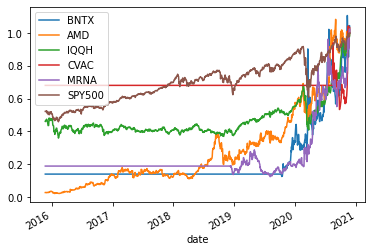

In [ ]:
(close_prices/close_prices.iloc[-1]).plot()

In [ ]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2015-11-24 to 2020-11-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BNTX    1292 non-null   float64
 1   AMD     1292 non-null   float64
 2   IQQH    1292 non-null   float64
 3   CVAC    1292 non-null   float64
 4   MRNA    1292 non-null   float64
 5   SPY500  1292 non-null   float64
dtypes: float64(6)
memory usage: 70.7 KB


In [ ]:
TOPERCENTAGE=100  #TOPERCENTAGE=1
TREASURYRATEYEARLY=0.01
BUSINESSDAYSINCALENDAR=252
INVESTDURATION=252


In [ ]:
returns=pd.DataFrame({})
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name]= current_returns.iloc[1:] * TOPERCENTAGE

 

In [ ]:
#drop SPY500 average
SPY=returns['SPY500']
del returns['SPY500']
names.remove('SPY500')

In [ ]:
returns_p=returns.copy()


In [ ]:
returns_p

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


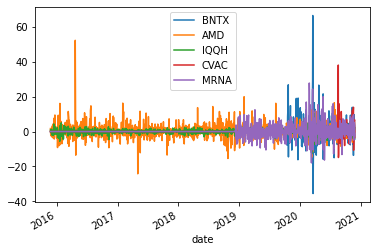

In [ ]:
returns_p.plot()

In [ ]:
returns

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


In [ ]:
mean_return = returns.mean()

In [ ]:
mean_return

BNTX    0.225714
AMD     0.358590
IQQH    0.071086
CVAC    0.043457
MRNA    0.178256
dtype: float64

In [ ]:
cov = returns.cov()
cov_np = cov.to_numpy()


In [ ]:
returns

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-25,0.000000,1.709402,0.787402,0.000000,0.000000
2015-11-26,0.000000,0.000000,0.585938,0.000000,0.000000
2015-11-27,0.000000,-2.100840,-0.582524,0.000000,0.000000
2015-11-30,0.000000,1.287554,0.390625,0.000000,0.000000
2015-12-01,0.000000,-0.847458,0.389105,0.000000,0.000000
...,...,...,...,...,...
2020-11-18,4.037732,-0.983685,0.209644,-2.418617,-4.573269
2020-11-19,4.964617,3.634601,0.019019,0.750268,4.364945
2020-11-20,9.628147,-1.052139,1.388097,5.970745,5.217204


In [ ]:
close_prices_assets=close_prices.drop(columns=["SPY500"])

In [ ]:
close_prices_assets.head()

,BNTX,AMD,IQQH,CVAC,MRNA
date,,,,,
2015-11-24,14.24,2.34,5.08,55.9,18.6
2015-11-25,14.24,2.38,5.12,55.9,18.6
2015-11-26,14.24,2.38,5.15,55.9,18.6
2015-11-27,14.24,2.33,5.12,55.9,18.6
2015-11-30,14.24,2.36,5.14,55.9,18.6


In [ ]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K


from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

path_checkpoint = "model_checkpoint.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)
def visualize_loss(history, title):
    loss = history.history["loss"]
    #val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    #plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()



class Model:
    def __init__(self):
        self.data = None
        self.model = None
        
    def __build_model(self, input_shape, outputs):
        '''
        Builds and returns the Deep Neural Network that will compute the allocation ratios
        that optimize the Sharpe Ratio of the portfolio
        
        inputs: input_shape - tuple of the input shape, outputs - the number of assets
        returns: a Deep Neural Network model
        '''
        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
          # Attention and Normalization
          x = layers.MultiHeadAttention(
              key_dim=head_size, num_heads=num_heads, dropout=dropout
          )(inputs, inputs)
          x = layers.Dropout(dropout)(x)
          x = layers.LayerNormalization(epsilon=1e-6)(x)
          res = x + inputs

          # Feed Forward Part
          x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
          x = layers.Dropout(dropout)(x)
          x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
          x = layers.LayerNormalization(epsilon=1e-6)(x)
          return x + res   

        def build_model(
          input_shape,
          head_size,
          num_heads,
          ff_dim,
          num_transformer_blocks,
          mlp_units,
          dropout=0,
          mlp_dropout=0,
          n_classes=outputs
      ):
          inputs = keras.Input(shape=input_shape)
          x = inputs
          for _ in range(num_transformer_blocks):
              x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

          x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
          for dim in mlp_units:
              x = layers.Dense(dim, activation="relu")(x)
              x = layers.Dropout(mlp_dropout)(x)
          outputs = layers.Dense(n_classes, activation="softmax")(x)
          return keras.Model(inputs, outputs)    

        model2 = build_model(
          input_shape,
          head_size=256,
          num_heads=4,
          ff_dim=4,
          num_transformer_blocks=4,
          mlp_units=[128],
          mlp_dropout=0.4,
          dropout=0.25,
      )

        def sharpe_loss(_, y_pred):
                # make all time-series start at 1
                data = tf.divide(self.data, self.data[0])  
                
                # value of the portfolio after allocations applied
                portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1) 
                
                portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  # % change formula

                sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)
                
                # since we want to maximize Sharpe, while gradient descent minimizes the loss, 
                #   we can negate Sharpe (the min of a negated function is its max)
                return -sharpe
        
        model.compile(loss=sharpe_loss, optimizer='adam')
        return model
    
    def get_allocations(self, data: pd.DataFrame):
        '''
        Computes and returns the allocation ratios that optimize the Sharpe over the given data
        
        input: data - DataFrame of historical closing prices of various assets
        
        return: the allocations ratios for each of the given assets
        '''
        
        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)
        
        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)
        
        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns))
        
        fit_predict_data = data_w_ret[np.newaxis,:]        
        history=self.model.fit(fit_predict_data, np.zeros(fit_predict_data.shape), epochs=850, shuffle=False,callbacks=[ modelckpt_callback])
        visualize_loss(history, "Training and Validation Loss")
        return self.model.predict(fit_predict_data)[0]

In [ ]:
model = Model()


Epoch 1/850
1/1 [==============================] - ETA: 0s - loss: -0.0863
Epoch 1: loss improved from inf to -0.08627, saving model to model_checkpoint.h5
1/1 [==============================] - 3s 3s/step - loss: -0.0863
Epoch 2/850
1/1 [==============================] - ETA: 0s - loss: -0.0865
Epoch 2: loss improved from -0.08627 to -0.08655, saving model to model_checkpoint.h5
1/1 [==============================] - 0s 342ms/step - loss: -0.0865
Epoch 3/850
1/1 [==============================] - ETA: 0s - loss: -0.0868
Epoch 3: loss improved from -0.08655 to -0.08679, saving model to model_checkpoint.h5
1/1 [==============================] - 0s 368ms/step - loss: -0.0868
Epoch 4/850
1/1 [==============================] - ETA: 0s - loss: -0.0870
Epoch 4: loss improved from -0.08679 to -0.08699, saving model to model_checkpoint.h5
1/1 [==============================] - 0s 349ms/step - loss: -0.0870
Epoch 5/850
1/1 [==============================] - ETA: 0s - loss: -0.0872
Epoch 5: loss

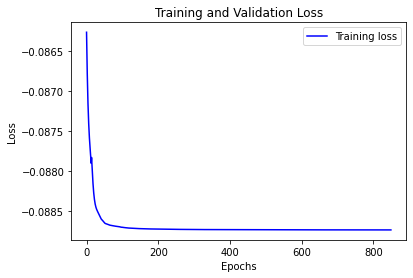

1/1 [==============================] - 0s 500ms/step


In [ ]:
best_w = model.get_allocations(pd.DataFrame(close_prices_assets))

In [ ]:
D = len(mean_return)
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

In [ ]:
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)

In [ ]:
duration_days=252
TOPERCENTAGE=100

In [ ]:
rsk=pd.Series(single_asset_risks,index=names,name='DAILY RISK %')
rsk['OPT_PORTFOLIO']=opt_risk
rsk=rsk.round(2)
rtr=pd.Series(single_asset_returns,index=names,name='CUMULATIVE RETURN %')
rtr['OPT_PORTFOLIO']=opt_ret
rtr=(((1 + rtr/TOPERCENTAGE)**duration_days - 1)*TOPERCENTAGE).round(2)

wgh=pd.Series(best_w,index=names,name='WEIGTHS %')
wgh['OPT_PORTFOLIO']=1
wgh=(wgh*TOPERCENTAGE).round(2)

pd.DataFrame(rtr).join(rsk).join(wgh)

,CUMULATIVE RETURN %,DAILY RISK %,WEIGTHS %
BNTX,76.50,3.99,42.24
AMD,146.46,4.07,57.72
IQQH,19.61,1.48,0.01
CVAC,11.57,1.72,0.01
MRNA,56.64,3.18,0.02
OPT_PORTFOLIO,114.00,2.96,100.00


In [ ]:
sharp_of_portfolio=opt_ret/opt_risk

In [ ]:
sharp_of_portfolio

0.10216037479270879